In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd /content/drive/My Drive/Colab Notebooks/dw_matrix/data


/content/drive/My Drive/Colab Notebooks/dw_matrix/data


In [0]:
df = pd.read_csv('men_shoes.csv', low_memory=False)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
['a'] * 5

['a', 'a', 'a', 'a', 'a']

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)


63.968341227870624

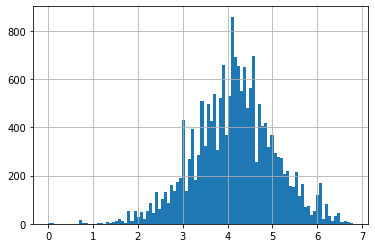

In [0]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true))) 
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
np.expm1(np.mean(np.log1p(y_true))) 

62.92811169273113

In [0]:
np.log1p(51.99)

3.9701032165046706

In [0]:
np.log(51.99)

3.9510513923956245

In [0]:
y_true

0        39.89
1        51.99
2        40.02
3        50.31
4        46.26
         ...  
18275    29.95
18276    64.95
18277    32.48
18278    31.48
18279    72.00
Name: prices_amountmin, Length: 18280, dtype: float64

In [0]:
df.brand.value_counts()

Nike                1709
PUMA                 574
Ralph Lauren         524
New Balance          361
VANS                 356
                    ... 
Code Alpha             1
Yukon Gear             1
Sport Wrap             1
Exposure Project       1
Outback Trading        1
Name: brand, Length: 1856, dtype: int64

In [0]:
df.brand.factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_cat'],
      dtype='object')

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['manufacturer_cat','brand_cat'])

(-58.539304199085976, 4.311223231615432)

In [73]:
add 

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_one
